# Finding the most efficient size for the Rear blocker of a 10-shell FOXSI rocket optics module

## @Milo
## February, 2018

The rays are generated using the python script at ***Milo_RayTracing/blockers/rays_Rblockers.py*** and saved in the folder ***Milo_RayTracing/blockers/rays_RB/***.

In [16]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 

rbrs = np.arange(0.0,2.805,0.2) # Rear blocker radii

All_Drays, All_Hrays, All_Prays = [], [], []
All_Dx, All_Dy, All_Hx, All_Hy, All_Px, All_Py = [], [], [], [], [], []

for rbr in rbrs:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/rays_RB/rays_RBR_=_'+str(rbr)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    All_Drays.append(Drays)
    All_Hrays.append(Hrays)
    All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    All_Hx.append(Hx)
    All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    All_Px.append(Px)
    All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    All_Dx.append(Dx)
    All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/rays_RB/rays_RBR_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/rays_RB/rays_RBR_=_0.2.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/rays_RB/rays_RBR_=_0.4.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/rays_RB/rays_RBR_=_0.6.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/rays_RB/rays_RBR_=_0.8.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/rays_RB/rays_RBR_=_1.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/rays_RB/rays_RBR_=_1.2.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/rays_RB/rays_RBR_=_1.4.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/rays_RB/rays_RBR_=_1.6.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/bloc

### Plot Rays vs Rear size blocker for a set FB radius of 3.17cm

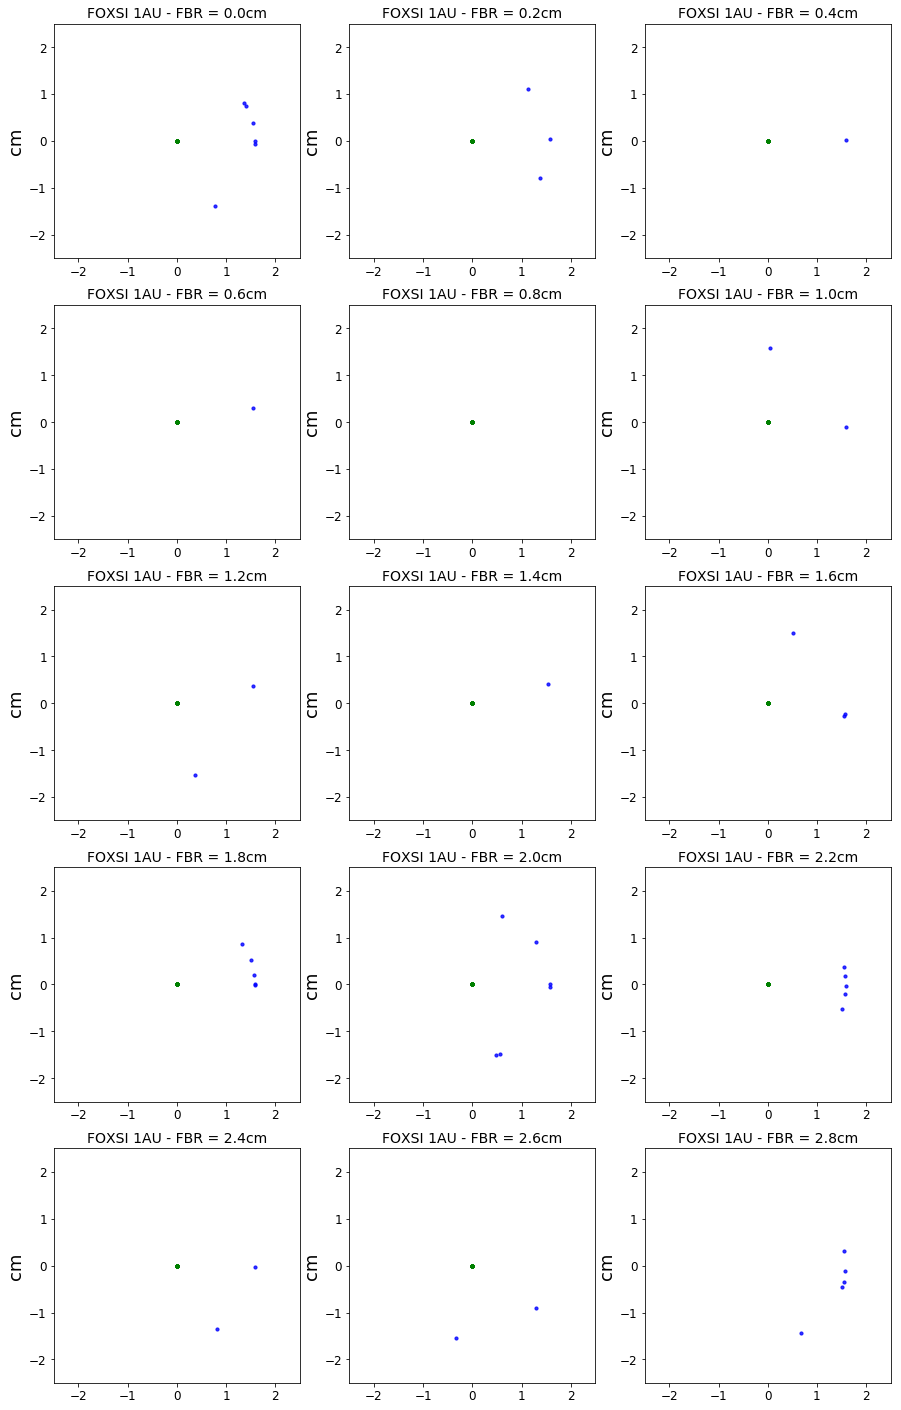

In [17]:
fig = plt.figure(figsize=(15,25))
for i, rbr in enumerate(rbrs):
    plt.subplot(5,3,i+1)
    plt.title('FOXSI 1AU - FBR = '+str(rbr)+'cm',fontsize=14)
    plt.ylabel('cm',fontsize=18)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.scatter(All_Hx[i],All_Hy[i],color='red',s=10.,alpha=0.8)
    plt.scatter(All_Px[i],All_Py[i],color='blue',s=10.,alpha=0.8)
    plt.scatter(All_Dx[i],All_Dy[i],color='green',s=10.,alpha=0.8)
    plt.ylim(-2.5,2.5)
    plt.xlim(-2.5,2.5)
plt.show()

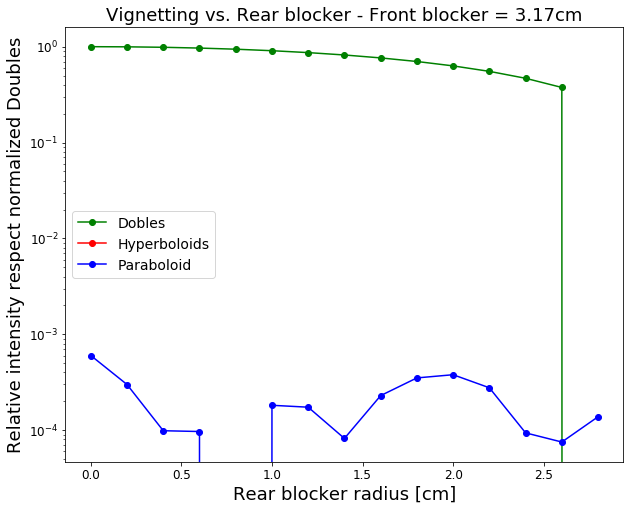

In [21]:
Rout = 3.29
Doubles, Hyp, Par = [], [], []
for i, rbr in enumerate(rbrs):
    Doubles.append(len(All_Drays[i]) * (Rout**2 - rbr**2))
    Hyp.append(len(All_Hrays[i]) * (Rout**2 - rbr**2))
    Par.append(len(All_Prays[i]) * (Rout**2 - rbr**2))

# Plotting :
fig = plt.figure(figsize=(10,8))
plt.title('Vignetting vs. Rear blocker - Front blocker = 3.17cm',fontsize=18)
plt.semilogy(rbrs, Doubles/max(Doubles),'go-',label='Dobles')
plt.semilogy(rbrs, Hyp/max(Doubles),'ro-',label='Hyperboloids')
plt.semilogy(rbrs, Par/max(Doubles),'bo-',label='Paraboloid')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Rear blocker radius [cm]',fontsize=18)
#plt.axvline(3.17,color='purple',linestyle='--',lw=0.8)
#plt.text(3.155,5e-1,'Most efficient front blocker size = 3.17cm',rotation=90,fontsize=12,color='purple')
plt.legend(fontsize=14)
plt.show()

### Linear scale :

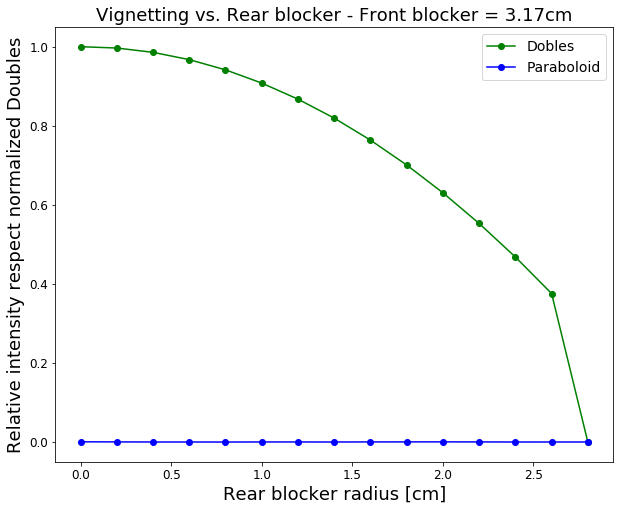

In [23]:
# Plotting :
fig = plt.figure(figsize=(10,8))
plt.title('Vignetting vs. Rear blocker - Front blocker = 3.17cm',fontsize=18)
plt.plot(rbrs, Doubles/max(Doubles),'go-',label='Dobles')
#plt.semilogy(rbrs, Hyp/max(Doubles),'ro-',label='Hyperboloids')
plt.plot(rbrs, Par/max(Doubles),'bo-',label='Paraboloid')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Rear blocker radius [cm]',fontsize=18)
#plt.axvline(3.17,color='purple',linestyle='--',lw=0.8)
#plt.text(3.155,5e-1,'Most efficient front blocker size = 3.17cm',rotation=90,fontsize=12,color='purple')
plt.legend(fontsize=14)
plt.show()

## The Double bounce flux rapidely decrease when increasing the rear blocker radius.

The rear blocker may be crucial at bloking **Ghost Rays** for off-axis sources. We need to assess what the best compromise for these two effects is.

In [25]:
Doubles[-2]/max(Doubles)

0.37561798357088166

Getting the maximum angle that a ray bouncing off the Hyperboloid (2-bounces) gets.

## This behaviour is so extrange that we need to investigate what is going on with the rear blocker. By idea is to plot a cross-section similar to the one I did for debugging the randomness of the rays generation.

## Reading data example

In [1]:
#import matplotlib
#matplotlib.pyplot.switch_backend('nbAgg')
%matplotlib inline
import numpy as np
from foxsisim.util import load_rays
import matplotlib.pyplot as plt
Rrays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/rays_RB/rays_RBR_=_0.0.csv')
print('Number of rays0 : {:d}'.format(len(Rrays)))
for ray in Rrays:
    ray.hist = ray.hist.tolist()

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/rays_RB/rays_RBR_=_0.0.csv loaded.
Number of rays0 : 10000


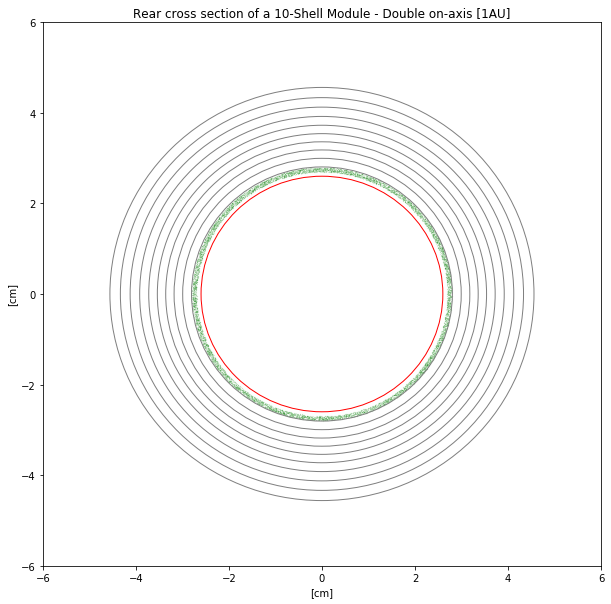

In [15]:
Drays = [ray for ray in Rrays if (ray.bounces ==2 )]
Dx, Dy = [], []
for ray in Drays:
    Dx.append(ray.pos[0])
    Dy.append(ray.pos[1])
    

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
# Plot Shells
FrontRadii = [5.345, 5.085, 4.835, 4.595, 4.365, 4.15, 3.94, 3.725, 3.51, 3.29]
InterRadii = [5.15, 4.9, 4.66, 4.43, 4.21, 4.0, 3.8, 3.59, 3.38, 3.17]
InnerRadii = [4.56, 4.335, 4.125, 3.92, 3.725, 3.54, 3.36, 3.18, 2.995, 2.805]
for r in InnerRadii:
    c = plt.Circle((0, 0), r, color='grey',fill=False)
    ax.add_artist(c)

rb = plt.Circle((0, 0), 2.6, color='red',fill=False)
ax.add_artist(rb)

# Plot random points
plt.scatter(Dx,Dy,s=0.01,color='g',alpha=0.4)
plt.title('Rear cross section of a 10-Shell Module - Double on-axis [1AU]')
plt.xlabel('[cm]')
plt.ylabel('[cm]')
plt.xlim(-6,6);plt.ylim(-6,6)
plt.show()

### This cross section brings to light that the Rear Blocker code has a bug and is killing more double bounces that it should.

Visualy we easily conclude that the maximum blocker size can go up to ~2.6cm radius.

I think the error is located in the way how I define "Drays". It seems that it takes all two bounces photons. That includes those that were killed by the rear blocker

In [30]:
Drays[101].pos

array([ -0.41921376,  -2.72451763,  60.        ])